# Geometriske objekter

`Punkt(Points)`, `Linjer(Lines)` og `Polygoner(Polygons)` er fundamentale geometriske objekter når vi jobber med romlig data i vektor format. I Python er [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) modulen som brukes for å utføre diverse geometriske operasjoner.

**Geometriske objekter består av koordinattuppler hvor:**

-  `Point` -objektet representerer et enkelt punkt i et rom. Punkt kan være enten todimensjonale (x, y) eller tredimensjonale (x, y, z).
-  `LineString` -objektet representerer en sekvens av punkt som er koblet sammen og former en linje. En linje består dermed av en liste med minst to koordinattuppler.
-  `Polygon` -objektet representerer et fyllt område som består av en liste med misnt tre koordinattuppler som utgjør den ytre ringen (og potensielt en liste med "hull-polygoner".
  
![Romlig datamodell](https://pythongis.org/_images/vector_data_model.png)

# Punkt i polygon

Det å finne ut om et spesifikt punkt befinner seg innenfor eller utenfor et omåde, eller om en linje krysser en annen linje eller et polygon, er fundamentale geografiske operasjoner. Slike romlige spørringer er typisk et av de første stegene i romlige analyser. Kobling av ulike romlige dataset er et av de vanligste stedene hvor punkt i polygon (PIP)-analyser utføres.

Du kan lese mer om den [teoretiske bakgrunnen for PIP-analyse](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm) hvis du ønsker.

I Shapely er det i hovedsak to måter å utføre en PIP-analyse:

1. Bruk av [within()](https://shapely.readthedocs.io/en/stable/manual.html#object.within) funksjonen som sjekker hvorvidt et punkt befinner seg inni et polygon
2. Bruk av [contains()](https://shapely.readthedocs.io/en/stable/manual.html#object.contains) funksjonen som sjekket om et polygon inneholder et punkt.

Selv om vi her snakker om **punkt** i polygon, er det også mulig å sjekke hvorvidt en linje eller et polygon er innenfor et annet polygon.

La oss lage noen punkt og utforske shapely-funksjonaliteten:

In [5]:
from shapely.geometry import Point, Polygon

# Create Point objects
punkt1 = Point(10.39506,63.43049)
punkt2 = Point(10.39693,63.42692)

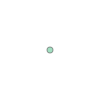

In [6]:
punkt1

La oss lage et polygon fra noen hjørne-koordinater:

In [7]:
koordinater = [(10.39444,63.43090),(10.39427,63.43010),(10.39594,63.43003),(10.39607,63.43084)]
polygon = Polygon(koordinater)

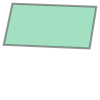

In [8]:
polygon

In [9]:
# Check points and polygon
print(punkt1)
print(punkt2)
print(polygon)

POINT (10.39506 63.43049)
POINT (10.39693 63.42692)
POLYGON ((10.39444 63.4309, 10.39427 63.4301, 10.39594 63.43003, 10.39607 63.43084, 10.39444 63.4309))


Vi kan nå sjekke hvorvidt punktene er innenfor polygonet vårt:

In [10]:
punkt1.within(polygon)

True

In [11]:
punkt2.within(polygon)

False

Altså, det første punktet vårt befinner seg innenfor polygonet, mens det andre punktet ikke gjør det. Faktisk er det første punktet nesten i midten av polygonet vårt, noe vi kan se hvis vi bruker ``centroid`` attributten til polygonet vårt.

In [12]:
print(punkt1)
print(polygon.centroid)

POINT (10.39506 63.43049)
POINT (10.39518111360239 63.43046575411061)


Vi kan også bruke motsatt metode for å sjekke hvorvidt polygonet vårt inneholder de to punktene:

In [13]:
print(polygon.contains(punkt1))
print(polygon.contains(punkt2))

True
False


## Punkt i polygon i Geopandas

PIP-analyser kan også gjøres for større datasett av gangen, for eksempel kan vi lese data inn i en GeoDataFrame og utføre en PIP-analyse på den:

In [14]:
import geopandas as gpd
import pandas as pd

bydeler = gpd.read_file('https://github.com/haavardaagesen/gmgi210/raw/refs/heads/main/data/oslo_bydeler.gpkg')
display(bydeler.head())

,bydelsnr,bynavn,geometry
0,030101,Oslo,"POLYGON ((10.66087 59.88365, 10.66472 59.88484..."
1,030102,Oslo,"POLYGON ((10.75378 59.91469, 10.75453 59.91496..."
2,030103,Oslo,"POLYGON ((10.77156 59.93095, 10.77135 59.93092..."
3,030104,Oslo,"POLYGON ((10.75136 59.91923, 10.75158 59.91921..."
4,030105,Oslo,"POLYGON ((10.65562 59.89038, 10.65381 59.89477..."


La oss finne punkter i marka i Oslo:

In [15]:
# Subset data to only one area
marka = bydeler.loc[bydeler['bydelsnr']=='030117']
marka.reset_index(drop=True, inplace=True)

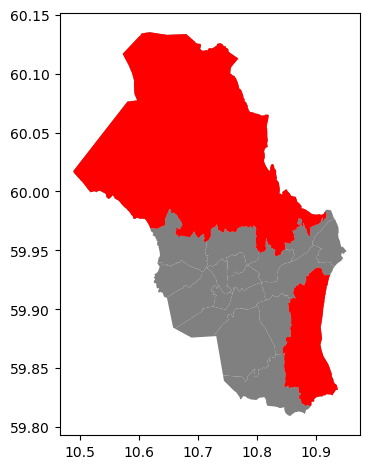

In [16]:
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
bydeler.plot(ax=ax, facecolor='gray')
marka.plot(ax=ax, facecolor='red')

plt.tight_layout()

La oss laste inn punktdata vi kan gjøre PIP-analysen på:

In [17]:
oslo_tweets = gpd.read_file('https://github.com/haavardaagesen/gmgi210/raw/refs/heads/main/data/oslo_tweets.gpkg')
oslo_tweets.head()

,id,lat,lon,id_str,row_id,user_id,geometry
0,982346962690367488,59.93626,10.82732,1200483,None,None,POINT (10.82732 59.93626)
1,1026597066485772288,59.9106,10.7465,1200577,None,None,POINT (10.74650 59.91060)
2,1026596950710337536,59.9106,10.7465,1200578,None,None,POINT (10.74650 59.91060)
3,1026596861803683840,59.9106,10.7465,1200579,None,None,POINT (10.74650 59.91060)
4,1026596746133221376,59.9106,10.7465,1200580,None,None,POINT (10.74650 59.91060)


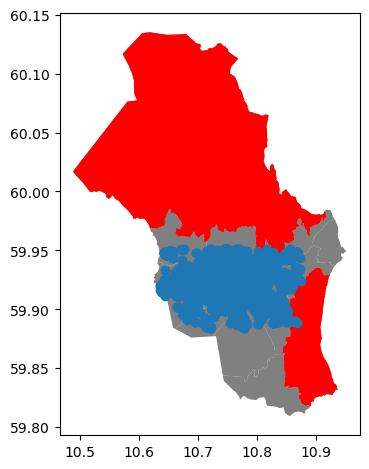

In [18]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
bydeler.plot(ax=ax, facecolor='gray')
marka.plot(ax=ax, facecolor='red')

oslo_tweets.plot(ax=ax)
plt.tight_layout()

For å filtrere punktene våre, kan vi lage en maske ved å bruke ``within``
funksjonaliteten i sentrums geometrien vår:

In [19]:
print(marka)

  bydelsnr bynavn                                           geometry
0   030117   Oslo  POLYGON ((10.84794 59.83820, 10.84796 59.83853...


In [20]:
pip_mask = oslo_tweets.within(marka.at[0, 'geometry'])
print(pip_mask.head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


Vi kan nå velge punktene fra oslo_tweets, basert på masken vår:

In [21]:
pip_data = oslo_tweets.loc[pip_mask]
pip_data

,id,lat,lon,id_str,row_id,user_id,geometry
7373,1038678408408907776,59.89007828,10.86457559,2499649,None,None,POINT (10.86458 59.89008)
8923,1027105146570985472,59.88870077,10.86744953,2439972,None,None,POINT (10.86745 59.88870)
21262,1039909235025485824,59.88906248,10.86361219,5266429,None,None,POINT (10.86361 59.88906)
21937,1038507952611749888,59.89007828,10.86457559,5950788,None,None,POINT (10.86458 59.89008)


Vi kan nå plotte de ulike lagene våre og se hvilke punkt som har blitt valgt ut:

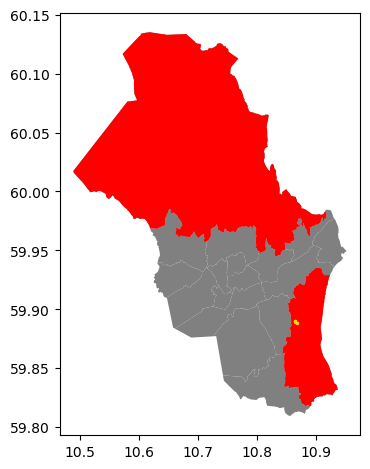

In [22]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
bydeler.plot(ax=ax, facecolor='gray')
marka.plot(ax=ax, facecolor='red')

# Plot points
pip_data.plot(ax=ax, color='gold', markersize=2)

plt.tight_layout()

In [23]:
pip_data.explore()